<a href="https://colab.research.google.com/github/khushipr/Parameter_Optimization_of_SVM/blob/main/Parameter_Optimization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Importing Necessary Libraries

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import learning_curve
import warnings
warnings.filterwarnings('ignore')

###Uploading the Dataset from UCI Library

In [14]:
from google.colab import files
uploaded = files.upload()

Saving EEG_Eye_State.csv to EEG_Eye_State.csv


In [15]:
dataset = pd.read_csv('EEG_Eye_State.csv')
dataset.head()

,AF3,F7,F3,FC5,T7,P7,O1,O2,P8,T8,FC6,F4,F8,AF4,eyeDetection
0,4329.23,4009.23,4289.23,4148.21,4350.26,4586.15,4096.92,4641.03,4222.05,4238.46,4211.28,4280.51,4635.90,4393.85,0
1,4324.62,4004.62,4293.85,4148.72,4342.05,4586.67,4097.44,4638.97,4210.77,4226.67,4207.69,4279.49,4632.82,4384.10,0
2,4327.69,4006.67,4295.38,4156.41,4336.92,4583.59,4096.92,4630.26,4207.69,4222.05,4206.67,4282.05,4628.72,4389.23,0
3,4328.72,4011.79,4296.41,4155.90,4343.59,4582.56,4097.44,4630.77,4217.44,4235.38,4210.77,4287.69,4632.31,4396.41,0
4,4326.15,4011.79,4292.31,4151.28,4347.69,4586.67,4095.90,4627.69,4210.77,4244.10,4212.82,4288.21,4632.82,4398.46,0


###Pre-Processing of Dataset

In [16]:
dataset.shape

(14980, 15)

In [17]:
dataset.isnull().sum()

AF3             0
F7              0
F3              0
FC5             0
T7              0
P7              0
O1              0
O2              0
P8              0
T8              0
FC6             0
F4              0
F8              0
AF4             0
eyeDetection    0
dtype: int64

<Axes: xlabel='eyeDetection', ylabel='count'>

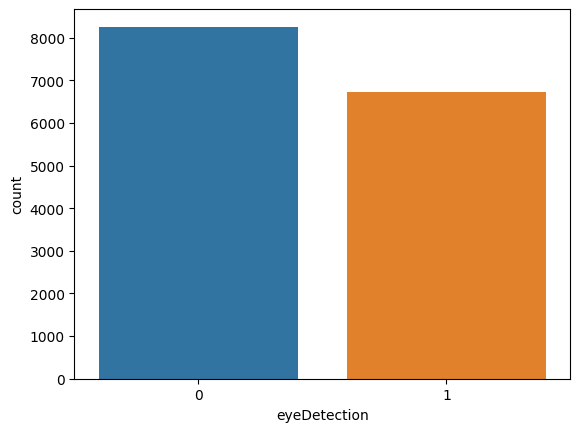

In [19]:
sns.countplot(x = 'eyeDetection', data=dataset)

In [20]:
X = dataset.iloc[:,0:-1]
y = dataset['eyeDetection']

In [21]:
ss = StandardScaler()
ss.fit_transform(X)

array([[ 0.00293429, -0.01170422,  0.56739848, ...,  0.03074472,
         0.01712667, -0.0038339 ],
       [ 0.00108436, -0.1120522 ,  0.6713903 , ...,  0.0061918 ,
         0.0145777 , -0.00548894],
       [ 0.00231631, -0.06742891,  0.70582915, ...,  0.06781481,
         0.01118458, -0.00461813],
       ...,
       [-0.0178483 , -0.41353148, -0.39058683, ..., -0.51230804,
        -0.01937827, -0.01306139],
       [-0.01496707, -0.39132867, -0.28682009, ..., -0.29012821,
        -0.01555481, -0.01114664],
       [-0.01373512, -0.26834254, -0.09054115, ..., -0.11729493,
        -0.01428032, -0.01114664]])

###Creation of 10 samples with 70-30 ratio of Training and Testing Set

In [22]:
samples = []
for i in range(10):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=i)
    samples.append((X_train, X_test, y_train, y_test))

In [23]:
samples

[(           AF3       F7       F3      FC5       T7       P7       O1       O2  \
  5438   4310.77  4003.08  4272.82  4132.82  4354.36  4626.15  4084.62  4636.92   
  7840   4283.08  3994.36  4260.00  4114.87  4334.87  4611.79  4042.05  4589.74   
  8474   4281.03  3984.10  4251.79  4108.21  4331.28  4614.36  4066.15  4629.74   
  13371  4280.51  4005.13  4256.41  4122.56  4342.05  4617.95  4077.95  4620.51   
  5813   4338.46  4054.36  4287.18  4142.05  4345.13  4619.49  4073.33  4588.72   
  ...        ...      ...      ...      ...      ...      ...      ...      ...   
  13123  4267.69  3976.92  4253.85  4112.82  4329.74  4609.23  4057.44  4607.18   
  3264   4316.92  4015.90  4247.18  4123.08  4344.62  4631.79  4084.10  4605.13   
  9845   4284.10  3982.56  4264.62  4108.72  4328.72  4611.79  4041.03  4611.79   
  10799  4361.03  4062.05  4325.64  4183.59  4378.46  4681.54  4115.38  4664.10   
  2732   4276.92  4001.54  4256.92  4108.72  4334.87  4613.85  4071.28  4608.72   
  
 

### Creation of a Fitness Function

In [24]:
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
result = pd.DataFrame(columns=['Sample', 'Best Accuracy', 'Best Kernel', 'Best Nu', 'Best Epsilon'])

In [25]:
def fitnessFunction(kernel, C, gamma):
  svm = SVC(kernel=kernel, C=C, gamma=gamma, max_iter=1000)
  svm.fit(X_train, y_train)
  y_pred = svm.predict(X_test)
  return accuracy_score(y_pred, y_test)

### Calling the Function for Every Sample

In [26]:
for i in range(len(samples)):
  best_accuracy = 0
  best_C = 0
  best_gamma = 0
  for kernel in kernels:
    X_train, X_test, y_train, y_test = samples[i]
    C = np.random.uniform(0, 10)
    gamma = np.random.uniform(0, 10)
    score = fitnessFunction(kernel, C, gamma)
    if score>best_accuracy:
      best_accuracy = round(score, 2)
      best_C = round(C, 2)
      best_gamma = round(gamma, 2)
      best_kernel = kernel
  print('Best Accuracy = ', best_accuracy, 'Best Kernel = ', best_kernel, 'Best Nu = ', best_C, 'Best Epsilon = ', best_gamma)
  result.loc[i] = [i+1, best_accuracy, best_kernel, best_C, best_gamma]

Best Accuracy =  0.54 Best Kernel =  sigmoid Best Nu =  5.9 Best Epsilon =  1.9
Best Accuracy =  0.56 Best Kernel =  rbf Best Nu =  4.71 Best Epsilon =  0.52
Best Accuracy =  0.55 Best Kernel =  linear Best Nu =  1.19 Best Epsilon =  0.14
Best Accuracy =  0.55 Best Kernel =  sigmoid Best Nu =  7.24 Best Epsilon =  3.44
Best Accuracy =  0.88 Best Kernel =  rbf Best Nu =  0.18 Best Epsilon =  0.69
Best Accuracy =  0.55 Best Kernel =  sigmoid Best Nu =  9.59 Best Epsilon =  0.65
Best Accuracy =  0.53 Best Kernel =  linear Best Nu =  0.43 Best Epsilon =  3.08
Best Accuracy =  0.54 Best Kernel =  rbf Best Nu =  2.61 Best Epsilon =  3.11
Best Accuracy =  0.54 Best Kernel =  linear Best Nu =  7.76 Best Epsilon =  0.62
Best Accuracy =  0.56 Best Kernel =  sigmoid Best Nu =  0.56 Best Epsilon =  3.4


###Creation of a Result Table

In [27]:
result

,Sample,Best Accuracy,Best Kernel,Best Nu,Best Epsilon
0,1,0.54,sigmoid,5.90,1.90
1,2,0.56,rbf,4.71,0.52
2,3,0.55,linear,1.19,0.14
3,4,0.55,sigmoid,7.24,3.44
4,5,0.88,rbf,0.18,0.69
5,6,0.55,sigmoid,9.59,0.65
6,7,0.53,linear,0.43,3.08
7,8,0.54,rbf,2.61,3.11
8,9,0.54,linear,7.76,0.62
9,10,0.56,sigmoid,0.56,3.40


### Plotting of the Convergence Graph/Linear Curve

In [28]:
X_train, X_test, y_train, y_test = samples[result['Best Accuracy'].idxmax()]

In [31]:
train_sizes, train_scores, test_scores = learning_curve(SVC(kernel=result['Best Kernel'].iloc[result['Best Accuracy'].idxmax()], 
                                                        C=result['Best Nu'].iloc[result['Best Accuracy'].idxmax()],
                                                        gamma=result['Best Epsilon'].iloc[result['Best Accuracy'].idxmax()],
                                                        max_iter = 1000), X_train, y_train, cv=10, scoring='accuracy', n_jobs=-1,
                                                        train_sizes = np.linspace(0.01, 1.0, 50))

In [32]:
train_sizes

array([  94,  285,  475,  666,  857, 1047, 1238, 1429, 1619, 1810, 2001,
       2191, 2382, 2573, 2763, 2954, 3145, 3335, 3526, 3717, 3907, 4098,
       4289, 4479, 4670, 4861, 5051, 5242, 5433, 5623, 5814, 6005, 6195,
       6386, 6577, 6767, 6958, 7149, 7339, 7530, 7721, 7911, 8102, 8293,
       8483, 8674, 8865, 9055, 9246, 9437])

In [33]:
train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)

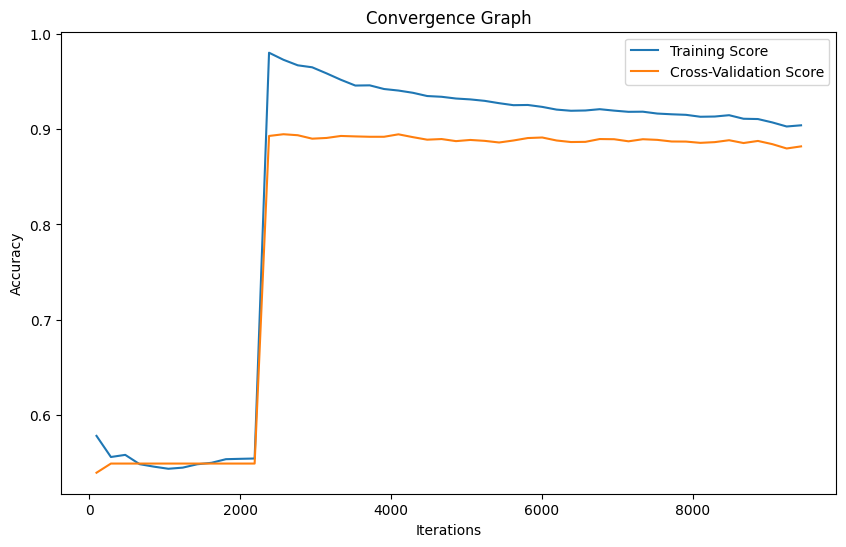

In [34]:
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, label='Training Score')
plt.plot(train_sizes, test_mean, label='Cross-Validation Score')
plt.xlabel('Iterations')
plt.ylabel('Accuracy')
plt.title('Convergence Graph')
plt.legend(loc="best")
plt.show()